In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv('electrical_dataset2 (1).csv')

In [7]:
df.head()

,Unnamed: 0,Timestamp,Voltage (V),Current (I),Power (W),Power_Factor,Temperature (°C),Humidity (%),Shift,Energy_Efficiency,Humidity
0,0,2024-12-01 00:00:00,222.483571,4.642510,0.289070,0.880626,21.734855,45.494834,Night,0.254562,Low
1,1,2024-12-01 00:01:00,219.308678,4.206038,0.194697,0.939144,20.003119,46.477508,Night,0.182849,Low
2,2,2024-12-01 00:02:00,223.238443,4.143615,0.472278,0.864156,17.952615,64.195316,Night,0.408122,High
3,3,2024-12-01 00:03:00,227.615149,4.188552,0.344859,0.926711,19.613098,37.214868,Night,0.319585,Low
4,4,2024-12-01 00:04:00,219.992912,5.165739,0.443865,0.931754,21.783244,55.741660,Night,0.413573,Medium


In [ ]:
#here i have taken features witch have positive correlation coefficient with our target variable which is power

In [9]:
arr = df[['Voltage (V)','Current (I)','Humidity (%)','Power_Factor']].to_numpy()

In [11]:
arr

array([[222.48357077,   4.64251035,  45.49483449,   0.88062604],
       [219.30867849,   4.20603839,  46.47750827,   0.93914446],
       [223.23844269,   4.14361509,  64.19531614,   0.86415601],
       ...,
       [216.47341638,   4.43144698,  61.01543427,   0.97450427],
       [222.47882787,   5.50765252,  50.00374804,   0.88313226],
       [223.22194227,   5.01407008,  65.94078708,   0.98943514]])

In [13]:
x = arr
y = df['Power (W)'].to_numpy()

print("Features")
print(x)
print(x.shape)
print("Power (W)")
print(y)
print(y.shape)


x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2) #Train-Test Split : Use an 80:20 split for training and testing


Features
[[222.48357077   4.64251035  45.49483449   0.88062604]
 [219.30867849   4.20603839  46.47750827   0.93914446]
 [223.23844269   4.14361509  64.19531614   0.86415601]
 ...
 [216.47341638   4.43144698  61.01543427   0.97450427]
 [222.47882787   5.50765252  50.00374804   0.88313226]
 [223.22194227   5.01407008  65.94078708   0.98943514]]
(10000, 4)
Power (W)
[0.28906965 0.1946974  0.47227785 ... 0.32530472 0.68310561 0.8414575 ]
(10000,)


In [15]:
print(x_train.shape) #Print the size of the training and test sets
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 4)
(2000, 4)
(8000,)
(2000,)


In [17]:
#We start with a Linear Regression Model. Train the model on the training set and print
#the coefficients and intercept of the model.


In [19]:
#algorithm
l_reg = linear_model.LinearRegression() 
model = l_reg.fit(x_train, y_train)
print("Coeff:" , l_reg.coef_)
print("Intercept: ", l_reg.intercept_)

Coeff: [6.32721535e-03 2.79567742e-01 1.58882363e-04 2.63223693e-02]
Intercept:  -2.353715605176797


In [21]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42,oob_score=True)

# Fit the regressor with x and y data
regressor.fit(x_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [23]:
#Evaluation on the performance of linear regression model

In [25]:
predictions1 = model.predict(x_test) 
true_values = y_test
#For linear regression model
print("Predictions: ",predictions1)
print("R^2 value: ",l_reg.score(x, y))
mae = mean_absolute_error(true_values, predictions1)
print('Mean Absolute Error:', mae)
mse = mean_squared_error(true_values, predictions1)
print('Mean Squared Error: ', mse)

Predictions:  [0.50457093 0.68189025 0.30836932 ... 0.64499125 0.68808404 0.52060211]
R^2 value:  0.7442225941966293
Mean Absolute Error: 0.07845956589461592
Mean Squared Error:  0.008869082139308449


In [27]:
#Evaluation on the performance of rain forest  regressor

In [29]:
predictions2 = regressor.predict(x_test)

# Evaluating the model
print("Predictions: ",predictions2) 
print("R^2 value: ",regressor.score(x, y))
mse = mean_squared_error(true_values, predictions2)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(true_values, predictions2)
print(f'Mean Absolute Error: {mae}')

Predictions:  [0.4532199  0.72880576 0.30083029 ... 0.56606962 0.64402116 0.50822126]
R^2 value:  0.9114512856729701
Mean Squared Error: 0.01004624906869953
Mean Absolute Error: 0.08252803057253053


In [31]:
# CLEARLY BY ANALYSING THE DATA WE CAN SAY THAT THE FOREST REGRESSION MODEL IS WORSE THAN THE LINEAR REGRESSION MODEL.
# AND ALSO ON THE BASIS OF MSE AND MAE (LESS THE ERROR BETTER IS THE MODEL)

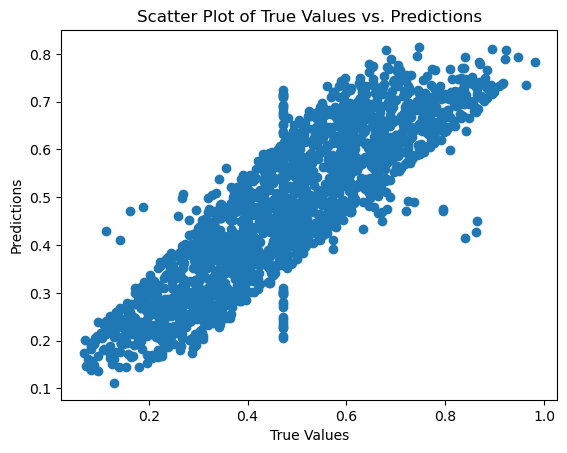

In [33]:
plt.scatter(true_values, predictions1) # Use plt.scatter to create the scatter plot
plt.xlabel("True Values") # Add labels to the plot
plt.ylabel("Predictions")
plt.title("Scatter Plot of True Values vs. Predictions")#for linear regression
plt.show() # Display the plot

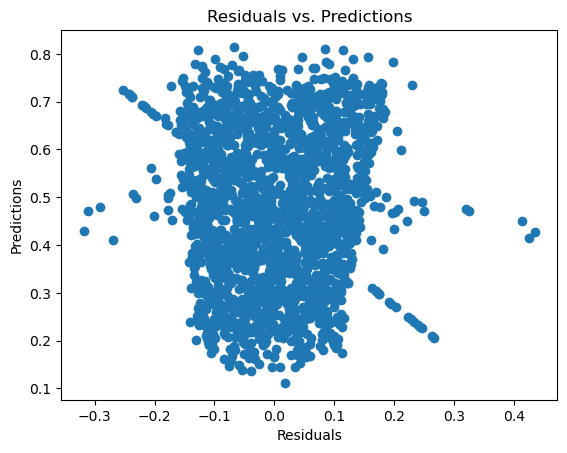

In [35]:
residuals = true_values - predictions1 #for linear regression
plt.scatter(residuals, predictions1)
plt.xlabel("Residuals")
plt.ylabel("Predictions")
plt.title("Residuals vs. Predictions")
plt.show()

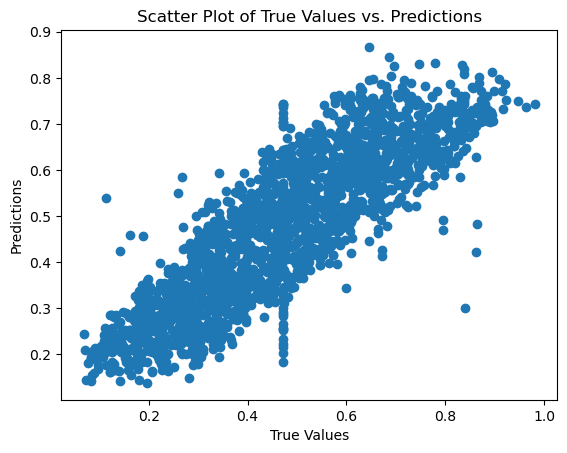

In [37]:
plt.scatter(true_values, predictions2) # Use plt.scatter to create the scatter plot
plt.xlabel("True Values") # Add labels to the plot
plt.ylabel("Predictions")
plt.title("Scatter Plot of True Values vs. Predictions")#for rainforest regressor
plt.show() # Display the plot

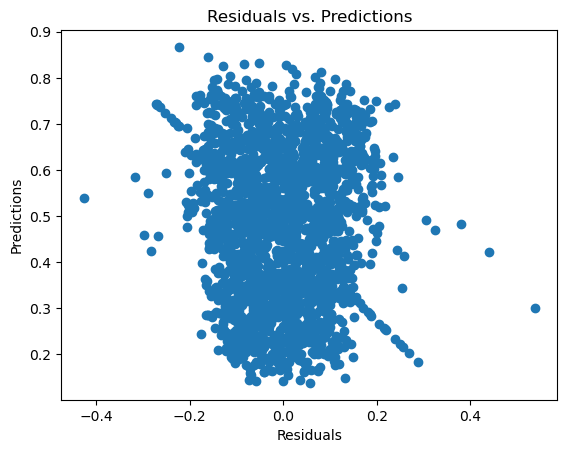

In [39]:
residuals = true_values - predictions2 #for rain forest regressor
plt.scatter(residuals, predictions2)
plt.xlabel("Residuals")
plt.ylabel("Predictions")
plt.title("Residuals vs. Predictions")
plt.show()